In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import os
import mglearn

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 14

from sklearn import decomposition
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
DATA_PATH = "bankruptcy/train"
TEST_PATH = "bankruptcy/sample"

In [3]:
# all data files from each path stored in each dictionary
def data_reading(PATH):
    data_files = {}
    
    for file_name in os.listdir(PATH):
        print("Reading file: ", file_name)
        
        curr_table = pd.read_csv(os.path.join(PATH, file_name), index_col=['Id'], low_memory=False)
        curr_table.replace('?', np.nan, inplace = True)
        curr_table.iloc[:, :-1] = curr_table.iloc[:, :-1].astype(np.float64)
        
        # fill missing value with median
        imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
        curr_table.loc[:, curr_table.columns!='Bankrupt'] = imp_mean.fit_transform(curr_table.loc[:, curr_table.columns!='Bankrupt'])
        
        # save
        data_files[file_name[:-4]] = curr_table
    
    print("Finished Reading for Folder: ", PATH)
    return data_files

In [4]:
train_files = data_reading(DATA_PATH)

Reading file:  5th_yr.csv
Reading file:  1st_yr.csv
Reading file:  4th_yr.csv
Reading file:  3rd_yr.csv
Reading file:  2nd_yr.csv
Finished Reading for Folder:  bankruptcy/train


In [5]:
def perform_pca_for_a_year(year = '1st_yr'):
    data = train_files[year].copy()
    y = data.loc[:,'Bankrupt']
    X = data.loc[:, data.columns!='Bankrupt']
    # X = StandardScaler().fit_transform(X)

    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X)
    principal_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])
    
    final_df = pd.concat([principal_df, data[['Bankrupt']]], axis = 1)
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = [0, 1]
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        indices_to_keep = final_df['Bankrupt'] == target
        ax.scatter(final_df.loc[indices_to_keep, 'principal component 1'],
                   final_df.loc[indices_to_keep, 'principal component 2'],
                   c = color,
                   s = 50)
    ax.legend(targets)
    ax.grid()
    
    print("explained variance ratio:", pca.explained_variance_ratio_)

In [6]:
def drop_numerical_outliers(df, z_thresh=3):
    print('Before dropping outliers: ', df.shape)
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.iloc[:,:-1].select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    # print(constrains)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)
    print('After dropping outliers: ', df.shape)
    return df

In [7]:
def perform_pca_for_a_year(year = '1st_yr'):
    # https://stackoverflow.com/questions/65241847/how-to-plot-3d-pca-with-different-colors
    data = train_files[year].copy()
    data = drop_numerical_outliers(data, z_thresh=3)
    y = data.loc[:,'Bankrupt']
    X = data.loc[:, data.columns!='Bankrupt']
    sc = StandardScaler()

    scaler = StandardScaler()
    scaler.fit(X) 
    X_scaled = scaler.transform(X)

    pca = PCA(n_components=3)
    pca.fit(X_scaled) 
    X_pca = pca.transform(X_scaled)
    ex_variance=np.var(X_pca,axis=0)
    ex_variance_ratio = ex_variance/np.sum(ex_variance)
    ex_variance_ratio


    Xax = X_pca[:,0]
    Yax = X_pca[:,1]
    Zax = X_pca[:,2]

    cdict = {0:'red',1:'green'}
    labl = {0:'Fine',1:'Bankrupt'}
    marker = {0:'*',1:'o'}
    alpha = {0:.3, 1:.5}

    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(111, projection='3d')

    fig.patch.set_facecolor('white')
    for l in np.unique(y):
        ix=np.where(y==l)
        ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
               label=labl[l], marker=marker[l], alpha=alpha[l])
    # for loop ends
    ax.set_xlabel("1st Principal Component", fontsize=14)
    ax.set_ylabel("2nd Principal Component", fontsize=14)
    ax.set_zlabel("3rd Principal Component", fontsize=14)

    ax.legend()
    plt.show()
    print("explained variance ratio:", pca.explained_variance_ratio_)

# Principal Components Analysis

Before dropping outliers:  (5744, 65)
After dropping outliers:  (5454, 65)


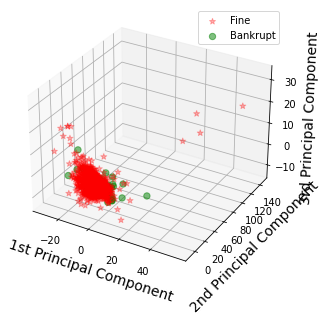

explained variance ratio: [0.22357694 0.1308106  0.08816755]


In [8]:
perform_pca_for_a_year('1st_yr')

Before dropping outliers:  (8314, 65)
After dropping outliers:  (8016, 65)


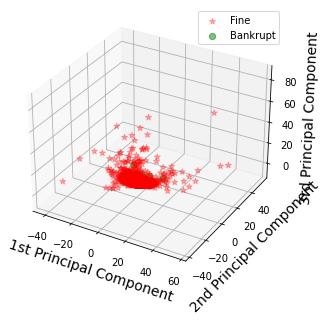

explained variance ratio: [0.19856797 0.10436708 0.07324557]


In [9]:
perform_pca_for_a_year('2nd_yr')

Before dropping outliers:  (8579, 65)
After dropping outliers:  (8189, 65)


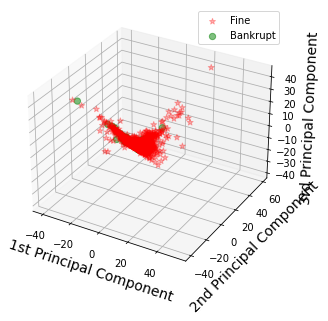

explained variance ratio: [0.20316614 0.095733   0.0688304 ]


In [10]:
perform_pca_for_a_year('3rd_yr')

Before dropping outliers:  (7995, 65)
After dropping outliers:  (7512, 65)


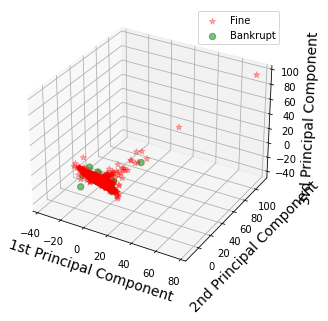

explained variance ratio: [0.18723226 0.11436622 0.08706304]


In [11]:
perform_pca_for_a_year('4th_yr')

Before dropping outliers:  (4818, 65)
After dropping outliers:  (4472, 65)


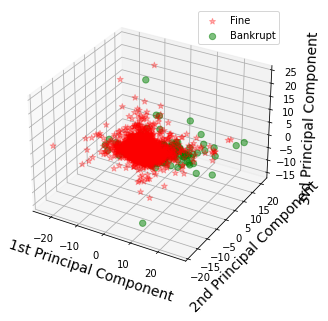

explained variance ratio: [0.25495724 0.10409674 0.065096  ]


In [12]:
perform_pca_for_a_year('5th_yr')

PCA PYTHON: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

EDA FEATURE SELECTION: https://www.visual-design.net/post/feature-selection-and-eda-in-machine-learning

# Correlation Matrix

<AxesSubplot:>

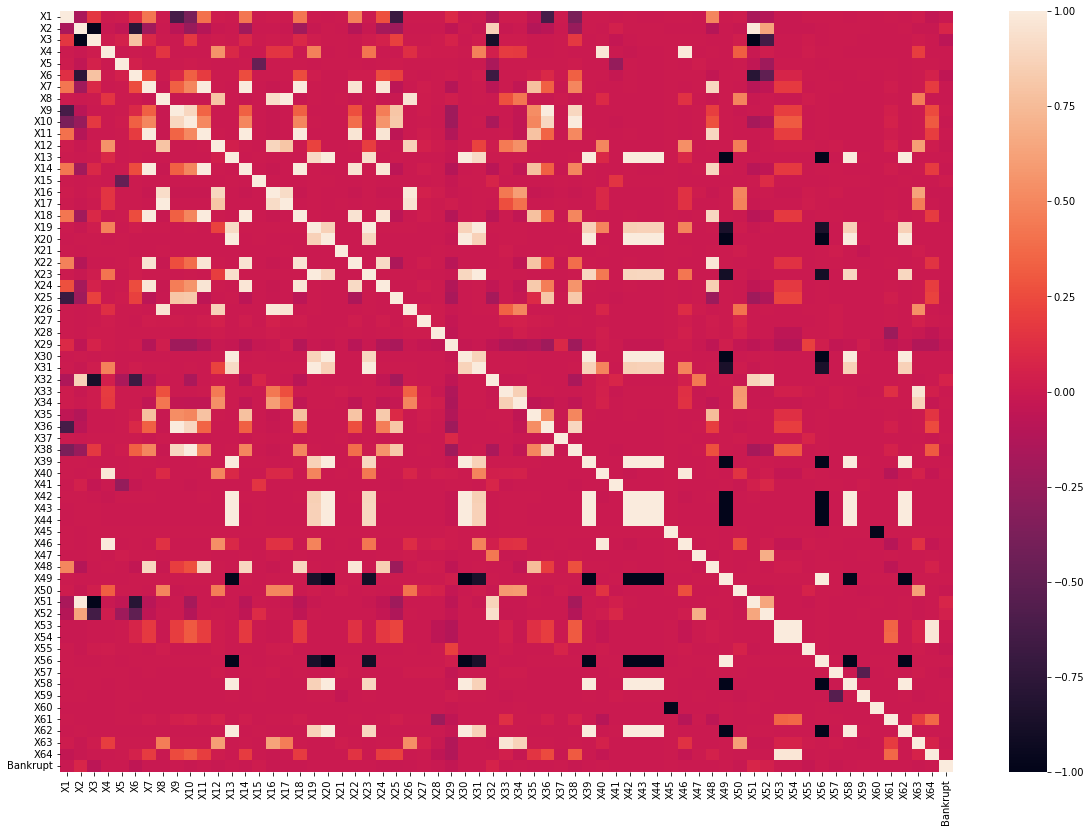

In [13]:
correlation = train_files['1st_yr'].corr()
sns.heatmap(correlation)

# Feature Importance: Information Gain

In [14]:
def feature_importance(year):
    from sklearn.feature_selection import mutual_info_classif
    data = train_files[year].copy()
    data = drop_numerical_outliers(data, z_thresh=3)
    y = data.loc[:,'Bankrupt']
    X = data.loc[:, data.columns!='Bankrupt']
    sc = StandardScaler()

    scaler = StandardScaler()
    scaler.fit(X) 
    X = scaler.transform(X)

    res = mutual_info_classif(X, y)
    feature_importance_df = pd.Series(res, data.columns[:len(data.columns)-1])
    feature_importance_df.plot(kind='barh')
    return feature_importance_df

Before dropping outliers:  (5744, 65)
After dropping outliers:  (5454, 65)


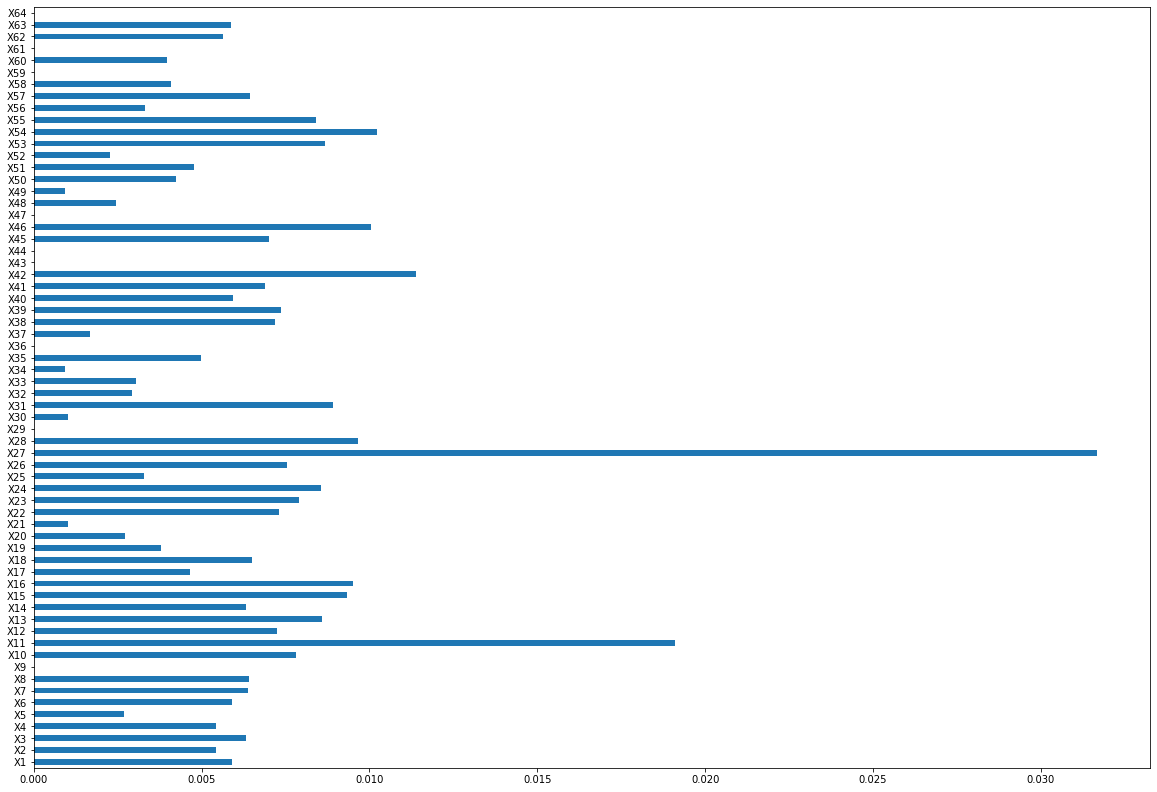

In [15]:
feature_importance_df_1st_year = feature_importance('1st_yr')

Before dropping outliers:  (8314, 65)
After dropping outliers:  (8016, 65)


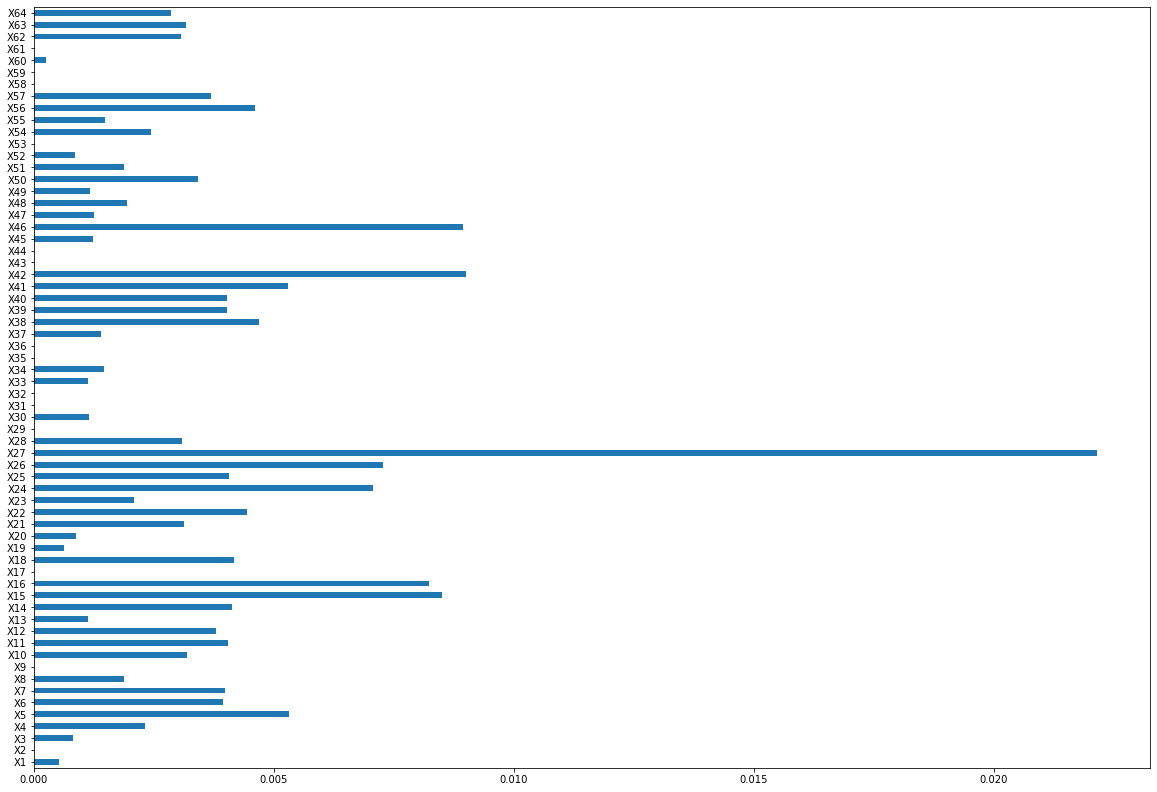

In [16]:
feature_importance_df_2nd_year = feature_importance('2nd_yr')

Before dropping outliers:  (8579, 65)
After dropping outliers:  (8189, 65)


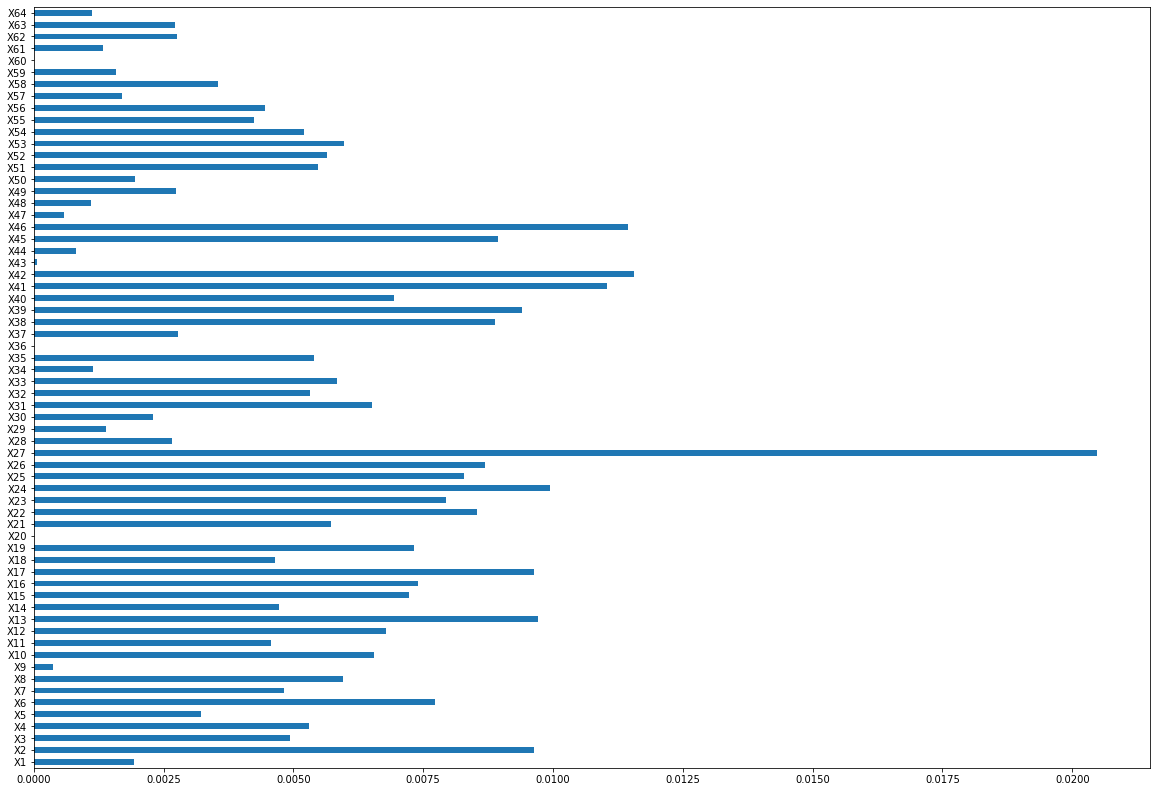

In [17]:
feature_importance_df_3rd_year = feature_importance('3rd_yr')

Before dropping outliers:  (7995, 65)
After dropping outliers:  (7512, 65)


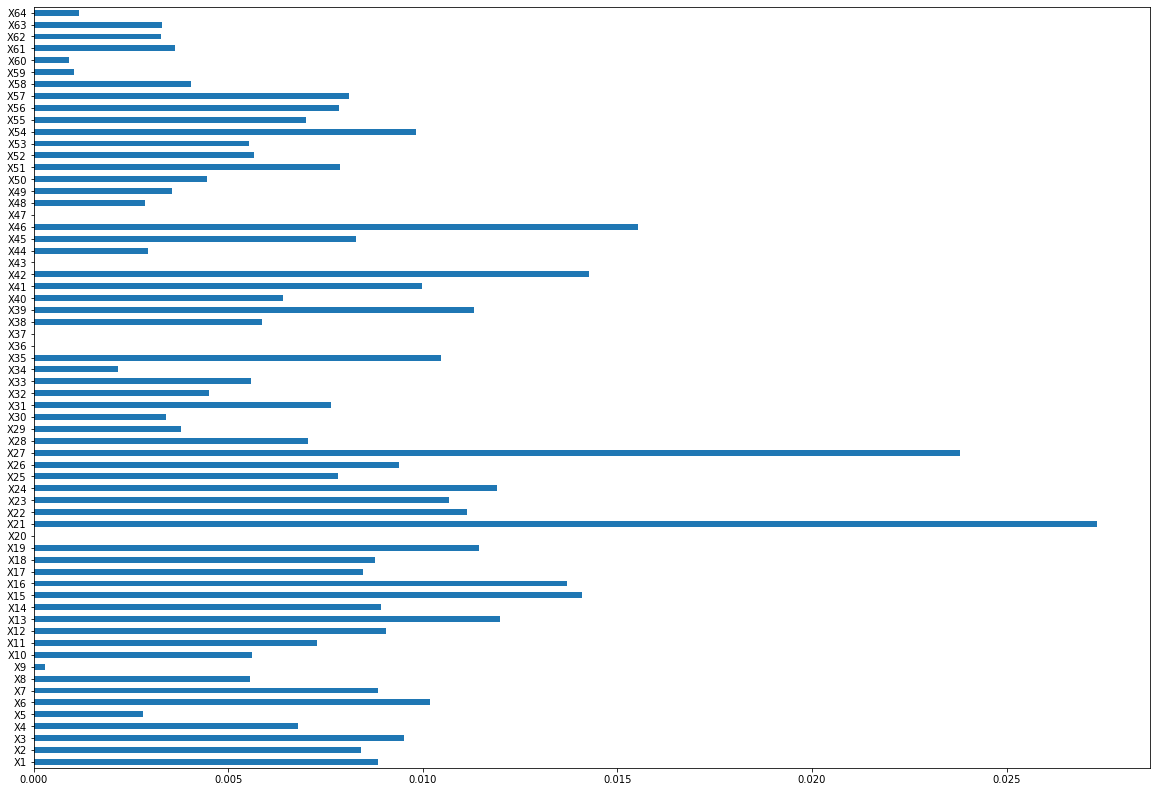

In [18]:
feature_importance_df_4th_year = feature_importance('4th_yr')

Before dropping outliers:  (4818, 65)
After dropping outliers:  (4472, 65)


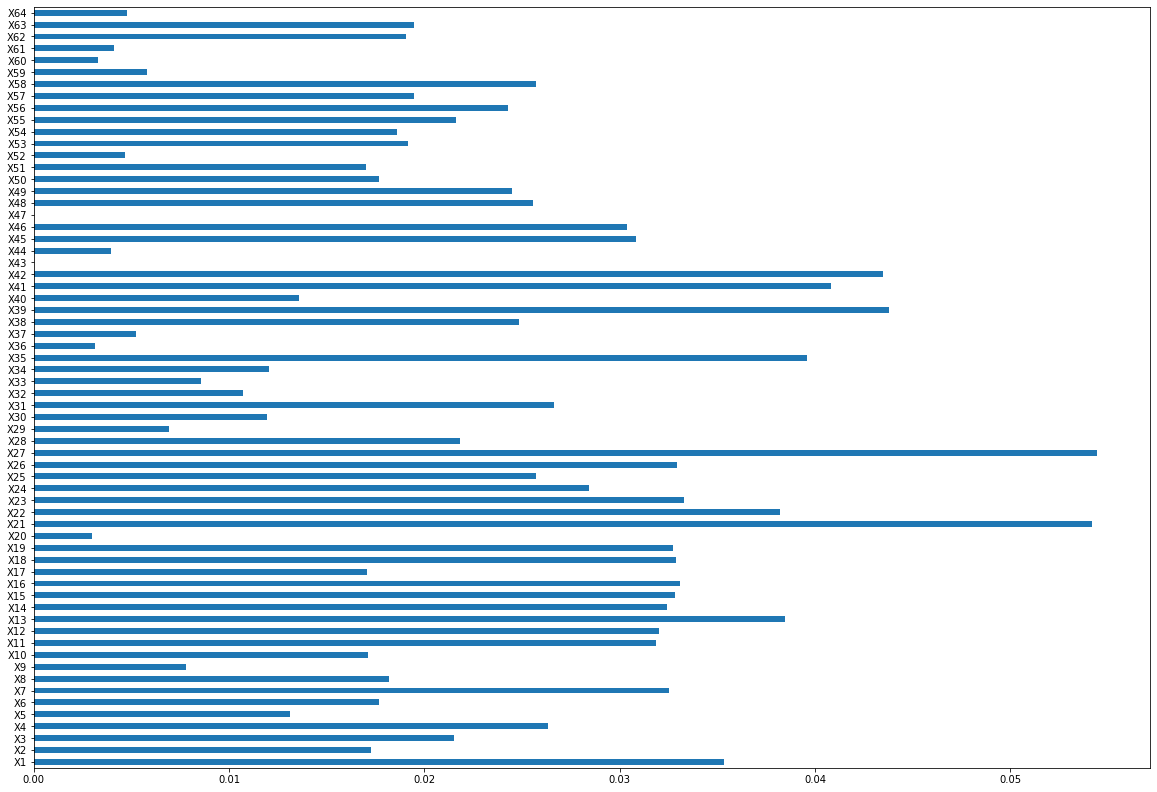

In [19]:
feature_importance_df_5th_year = feature_importance('5th_yr')

In [20]:
all_feature_importance = feature_importance_df_1st_year+feature_importance_df_2nd_year+feature_importance_df_3rd_year+feature_importance_df_4th_year+feature_importance_df_5th_year
all_feature_importance = all_feature_importance.to_frame()
all_feature_importance.rename(columns = {0: 'feature_importance'}, inplace = True)

In [21]:
all_feature_importance

feature_importance
X1             0.052530
X2             0.040756
X3             0.043081
X4             0.046171
X5             0.027162
..                  ...
X60            0.008445
X61            0.009100
X62            0.033798
X63            0.034497
X64            0.009904

[64 rows x 1 columns]

In [22]:
features_name = open("features.txt", "r")
all_feature_meanings_dict = {}
all_feature_meanings_list = []
for feature in features_name.readlines():
    feature_index = feature.split(" ")[0]
    feature_meaning = " ".join(feature.split(" ")[1:])[:-1]
    all_feature_meanings_dict[feature_index] = feature_meaning
    all_feature_meanings_list.append(feature_meaning)
print(all_feature_meanings_dict)

{'X1': 'net profit / total assets', 'X2': 'total liabilities / total assets', 'X3': 'working capital / total assets', 'X4': 'current assets / short-term liabilities', 'X5': '[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365', 'X6': 'retained earnings / total assets', 'X7': 'EBIT / total assets', 'X8': 'book value of equity / total liabilities', 'X9': 'sales / total assets', 'X10': 'equity / total assets', 'X11': '(gross profit + extraordinary items + financial expenses) / total assets', 'X12': 'gross profit / short-term liabilities', 'X13': '(gross profit + depreciation) / sales', 'X14': '(gross profit + interest) / total assets', 'X15': '(total liabilities * 365) / (gross profit + depreciation)', 'X16': '(gross profit + depreciation) / total liabilities', 'X17': 'total assets / total liabilities', 'X18': 'gross profit / total assets', 'X19': 'gross profit / sales', 'X20': '(inventory * 365) / sales', 'X21': 'sales (n) /

In [23]:
all_feature_importance["feature_meanings"] = all_feature_meanings_list

In [24]:
all_feature_importance

feature_importance                                   feature_meanings
X1             0.052530                          net profit / total assets
X2             0.040756                   total liabilities / total assets
X3             0.043081                     working capital / total assets
X4             0.046171            current assets / short-term liabilities
X5             0.027162  [(cash + short-term securities + receivables -...
..                  ...                                                ...
X60            0.008445                                  sales / inventory
X61            0.009100                                sales / receivables
X62            0.033798              (short-term liabilities *365) / sales
X63            0.034497                     sales / short-term liabilities
X64            0.009904                                sales / fixed asset

[64 rows x 2 columns]

In [27]:
all_feature_importance.to_csv("feature_meanings.csv")

In [25]:
all_feature_importance.sort_values(by="feature_importance", ascending=False)[:10]

feature_importance                                   feature_meanings
X27            0.152496  profit on operating activities / financial exp...
X21            0.091358                            sales (n) / sales (n-1)
X42            0.089689             profit on operating activities / sales
X46            0.076355  (current assets - inventory) / short-term liab...
X39            0.075905                            profit on sales / sales
X41            0.074001  total liabilities / ((profit on operating acti...
X15            0.071949  (total liabilities * 365) / (gross profit + de...
X16            0.071932  (gross profit + depreciation) / total liabilities
X13            0.069860              (gross profit + depreciation) / sales
X22            0.069603      profit on operating activities / total assets

In [26]:
all_feature_importance.sort_values(by="feature_importance", ascending=True)[:10]

feature_importance                                   feature_meanings
X43            0.000069  rotation receivables + inventory turnover in days
X47            0.001843          (inventory * 365) / cost of products sold
X36            0.003164                         total sales / total assets
X20            0.006584                          (inventory * 365) / sales
X44            0.007698                        (receivables * 365) / sales
X59            0.008421                     long-term liabilities / equity
X60            0.008445                                  sales / inventory
X9             0.008457                               sales / total assets
X61            0.009100                                sales / receivables
X64            0.009904                                sales / fixed asset

Information gain is commonly used in the construction of decision trees from a training dataset, by evaluating the information gain for each variable, and selecting the variable that maximizes the information gain, which in turn minimizes the entropy and best splits the dataset into groups for effective classification.

Here we can observe that these features matter the most:
1. X27: profit on operating activities/financial expenses
2. X21: sales (n)/sales (n-1)
3. X42: profit on operating activities/sales

Here we can observe that these features matter the least:
1. X43: rotation receivables + inventory turnover in days
2. X47: (inventory * 365) / cost of products sold
3. X36: total sales/total assets